In [1]:
from sklearn.cluster import  KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("KMeans.txt",delimiter="")
k = 4

In [3]:
model = KMeans(n_clusters=k)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
centers  = model.cluster_centers_
print(centers)

[[-1.375      -0.5325    ]
 [-0.2925      0.2325    ]
 [-0.38083333 -0.435     ]
 [-1.19473684  0.24052632]]


In [5]:
result = model.predict(data)
print(result)

[3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 3 3 3 3]


In [6]:
model.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

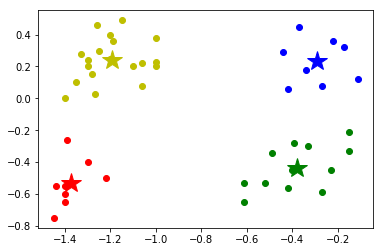

In [8]:
mark = ['or','ob','og','oy']
for i,d in enumerate(data):
    plt.plot(d[0],d[1],mark[result[i]])
    
#     画出各个分类的中心点
mark =['*r','*b','*g','*y']
for i , center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)
plt.show()

In [9]:
# enumerate()函数用于将一个可遍历的数据对象（如列表，元组或字符串）组合为一个索引序列，同时列出数据和数据下标，一般用在for循环当中
seasons = ['Spring','Summer','Fall','Winter']
list(enumerate(seasons))

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

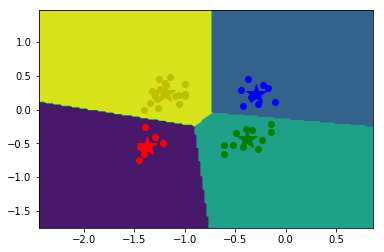

In [14]:
# 获取数据值所在的范围
x_min,x_max = data[:,0].min()-1,data[:,0].max()+1
y_min,y_max = data[:,1].min()-1,data[:,1].max()+1
# 生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])#ravel与flatten类似，多维数据转一维，flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx,yy,z)
# 显示结果
# 画出各个数据点，用不同颜色表示分类
mark = ['or','ob','og','oy']
for i ,d in enumerate(data):
    plt.plot(d[0],d[1],mark[result[i]])
    
#     画出各个分类的中心点
mark = ['*r','*b','*g','*y']
for i,center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)
plt.show()